# Chosing the Right ML Models

When you look at machine learning algorithms, there is no one solution or one approach that fits all. There are several factors that can affect your decision to choose a machine learning algorithm.

Thus, we will look at some of the factors that can help us narrow down the search for the machine learning models based on what problems we have. We will go over cons/pros of some models. Also, we will see some of their differences to each other and the bad case(bad dataset) to use a specific model.

![alt text](ml_models.png "split")

Source:https://cdn.oreillystatic.com/en/assets/1/event/105/Overcoming%20the%20Barriers%20to%20Production-Ready%20Machine-Learning%20Workflows%20Presentation%201.pdf

![alt text](sickit_models.png "split")

Link: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## Categorize the Problem

Let's see what factors can categorize our problems. These can help us narrow down the search for the machine learning models.

### Input

 - labelled data => **Supervised Learning**
 - unlabelled data, so want to find the structure => **Unsupervised Learning**
 - optimize an objective function by interacting with environment => **Reinforcement Learning**

### Ouput

- number => **Regression Model**
- classes => **Classification Model**
- set of input groups => **Cluster Model**

### Speed

We should not underestimate the importance of speed in real time applications. For example, it's important that classification of road signs be as fast as possible in autonomous driving.

- How long does it take to build a model(Does the learning fast?)
- How long does the model take to make predictions

### Model Complexity

Model is **Complex** if

- More features to learn/predict
- More complex feature engineering(ex) Polynomial terms, interactions, principal components)
- more computational overhead(ex) decition tree-> random forests with more trees)

We can reduce data redundancy/dimensionality like using PCA(Principal Component Analysis)

=> Note that the more complex the algorithm, the more chances of overfitting

## MODELS

Now, let's go over some real machine learning models with examples.

In [127]:
# Prepare for the models
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
sns.set(style='whitegrid')

import pydotplus
import collections


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as pt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier 
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn


## Logistic Regression vs Naive Bayes

### - Logistic Regression


**<**PROS**>**
    
- do not need to worry as much about correlations among features, like in **Naive Bayes**.
- easily update the model to take in new data
- easy probabilistic interpretation
- can find the most effective features to the target
- it works better if we remove target-unrelated variables and feature correlated variables(very similar to each other) => Feature Engineering important
- Simple, so good baseline to compare to other algorithms.

**<**CONS**>**

- if the correlations are mostly nonlinear: use **SVM**
- if sparsity and multicollinearity are a concern: **Adaptive Lasso with Ridge(weights) + Lasso**

### - Naive Bayes

**<**PROS**>**
    
- super simple(just doing some counts) yet performing well in practice.
- compute the multiplication of independent distributions
- require less training data
- no distribution requirements
- converge quicker than discriminative models(e.g. **logistic regression**) under conditional independence assumption

**<**CONS**>**

- During the case of “Zero Frequency”, when the categorical variable is not observed in the training set, then the classifier will be unable to predict with an assumption of “Zero” probability.
- Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

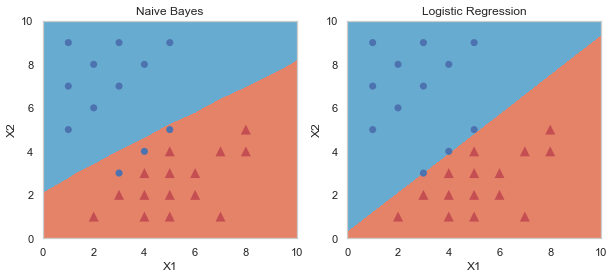

In [2]:
## create a test data set ##
pos = np.array([[1,5], [1,7], [1,9], [2,8], [3,7], [1,11], [3,3], \
[5,5], [4,8], [5,9], [2,6], [3,9], [4,4]])
neg = np.array([[4,1], [5,1], [3,2], [2,1], [8,4], [6,2], [5,3], \
[4,2], [7,1], [5,4], [6,3], [7,4], [4,3], [5,2], [8,5]])
all_points = np.concatenate((pos,neg), 0)
labels = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])
 
## compare Naive Bayes and Logistic Regression ##
 
# Fit Naive Bayes
gnb = GaussianNB()
gnb.fit(all_points, labels)
 
# make NB predictions and plot
x1_mesh, x2_mesh = np.meshgrid(np.arange(0,11,1), np.arange(0,11,1))
Y_NB = gnb.predict_proba(np.c_[x1_mesh.ravel(), x2_mesh.ravel()])[:,1]
Y_NB = Y_NB.reshape(x1_mesh.shape)
 
fig1, axes = plt.subplots(1,2, figsize=(10,4))
 
axes[0].contourf(x1_mesh, x2_mesh, Y_NB, levels=(np.linspace(0,1.1,3)), \
cmap='RdBu')
axes[0].scatter(pos[:,0], pos[:,1], s=50, \
edgecolors='none')
axes[0].scatter(neg[:,0], neg[:,1], marker='^', c='r', s=100,\
edgecolors='none')
axes[0].set_xlim([0,10]); axes[0].set_ylim([0,10]); axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2'); axes[0].set_title('Naive Bayes')
#plt.legend(['Positive Points', 'Negative Points'], scatterpoints=1)
#.savefig('NB_classification.png', bbox_inches='tight')
 
# Fit Logistic Regression
lr = LogisticRegression()
lr.fit(all_points, labels)
 
# Make predictions and plot
Y_LR = lr.predict_proba(np.c_[x1_mesh.ravel(), x2_mesh.ravel()])[:,1]
Y_LR = Y_LR.reshape(x1_mesh.shape)
 
axes[1].contourf(x1_mesh, x2_mesh, Y_LR, levels=(np.linspace(0,1.1,3)), \
cmap='RdBu')
axes[1].scatter(pos[:,0], pos[:,1], s=50, \
edgecolors='none')
axes[1].scatter(neg[:,0], neg[:,1], marker='^', c='r', s=100,\
edgecolors='none')
axes[1].set_xlim([0,10]); axes[1].set_ylim([0,10]); axes[1].set_xlabel('X1'); 
axes[1].set_ylabel('X2'); axes[1].set_title("Logistic Regression")
plt.savefig('compare_classification.png', bbox_inches='tight')


    Blue shaded areas represent a prediction of positive labels for the data points, the red shaded areas represent predictions of negative labels.

**Gaussian Naive Bayes** assumes that points close to the centroid of class are likely to be members of that class, which leads it to mislabel positive training points with features (3,3), (4,4) and (5,5). 
    
**Logistic regression** on the other hand is only concerned with correctly classifying points, so the signal from the outliers is more influential on its classification.

**So.. which algorithm should we use?** 
**It depends!**

In this example, logistic regression is able to correctly classify the outliers with positive labels while Naive Bayes is not. If these points are indeed an indicator of the underlying structure of positive points, then **logistic regression** has performed better. On the other hand, if they are truly outliers, than **Naive Bayes** has performed better. 

In general, **Logistic Regression** has been found to outperform **Naive Bayes** on large data sets but is prone to over fit small data sets. The two algorithms will converge asymptotically if the **Naive Bayes** assumption holds.

## Decision Trees vs Neural Networks

### - Decision Trees

**<**PROS**>**
    
- easily handle feature interactions and they're non-parametric. Thus, don't have to worry about outliers or whether the data is linearly separable.

**<**CONS**>**

- Don’t support online learning, so you have to rebuild your tree when new examples come on. 
- easily overfit. Ensemble methods like **random forests** or **boosted trees** fix this problem
- take a lot of memory (the more features you have, the deeper and larger your decision tree is likely to be)

### - Neural Network

**<**PROS**>**
    
- Neural networks are flexible and can be used for both regression and classification problems. Any data which can be made numeric can be used in the model, as neural network is a mathematical model with approximation functions.
- Neural networks are good to model with nonlinear data with large number of inputs; for example, images. It is reliable in an approach of tasks involving many features. It works by splitting the problem of classification into a layered network of simpler elements.
- Once trained, the predictions are pretty fast.
- Neural networks can be trained with any number of inputs and layers.
- Neural networks work best with more data points.

**<**CONS**>**

- Neural networks are black boxes, meaning we cannot know how much each independent variable is influencing the dependent variables.
- It is computationally very expensive and time consuming to train with traditional CPUs.
- Neural networks depend a lot on training data. This leads to the problem of over-fitting and generalization. The mode relies more on the training data and may be tuned to the data.

Most of the times **a neural network** will give you good results if you are using it for the right problem, but if it doesn’t perform well, you will have a lot of trouble finding why it didn’t go as expected, especially a Deep Neural network(which will be the case most of the times).

![alt text](NN.png "split")

Link: https://medium.com/datadriveninvestor/when-not-to-use-neural-networks-89fb50622429

For example, **Banks** generally will **not** use **Neural Networks** to predict whether a person is creditworthy because they need to explain to their customers why they denied them a loan.

**Explanation Using Data**

In [2]:
#read the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
credit = pd.read_excel(url,header=1)

In [3]:
#model preparation
target1 = credit[["default payment next month"]]
creditData = credit.drop('default payment next month', axis = 1)

In [4]:
#divide train/test dataset
creditData1 = preprocessing.scale(creditData)
xTrainData1,xTestData1,yTrainData1,yTestData1 = train_test_split(creditData1,target1, test_size=0.33, 
                                                             random_state=122519,stratify = target1)

In [5]:
#apply Deicison Tree model
clf = DecisionTreeClassifier().fit(xTrainData1,yTrainData1)
y_pred4 = clf.predict(xTestData1)

In [6]:
print("Accuracy is",metrics.accuracy_score(yTestData1,y_pred4))

Accuracy is 0.7235353535353536


In [7]:
#apply NeuralNetwork model
neuralNet = MLPClassifier(activation = 'logistic',hidden_layer_sizes=(5,60,60),max_iter = 10000)

In [8]:
neuralNet.fit(xTrainData1,yTrainData1)
prediction = neuralNet.predict(xTestData1)

In [9]:
print("Accuracy is",metrics.accuracy_score(yTestData1, prediction))

Accuracy is 0.8204040404040404


In [10]:
#visualize decision tree 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.293241 to fit



In [11]:
#get the most important features 
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = creditData.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [12]:
feature_importances.head()

importance
PAY_0        0.154449
ID           0.091794
AGE          0.065818
BILL_AMT1    0.058051
LIMIT_BAL    0.053138

We got a higher accuracy for **Neural Network** model than a **Decision Tree** models'. However, in this case, it is better to use **Decision Tree** because we need to provide an explanation to customers whether or not a customer will default on his/her payment next month.

Even tough the visual of decision tree is not clear enough in this example(since there are so many features), it would be clearer if we just draw the diagram based on the most important features. 

    For example,

![alt text](DT.png "split")

Link: https://medium.com/datadriveninvestor/when-not-to-use-neural-networks-89fb50622429

## Random Forest


**<**PROS**>**
    
- solve both regression and classification problems with large data sets. 
- helps identify most significant variables 
- highly scalable to any number of dimensions and has generally quite acceptable performances.
-  save data preparation time, as they do not require any input preparation and are capable of handling numerical, binary and categorical features, without scaling, transformation or modification.
- there are genetic algorithms, which scale admirably well to any dimension and any data with minimal knowledge of the data itself, with the most minimal and simplest implementation being the microbial genetic algorithm. 
- Random Forest machine learning algorithms can be grown in parallel.

**<**CONS**>**

- learning may be slow (depending on the parameterization)
- not possible to iteratively improve the generated models

##### Random Forests don’t fit very well for increasing or decreasing trends which are usually encountered when dealing with time-series analysis, such as seasonality!

In [43]:
x = np.linspace(0,1, num=50)
y = x + np.random.uniform(-0.2, 0.2,x.shape)

    Let x be our input which is linearly distributed between 0 and 1, and is a Vector of size 50.
    Let, our dependent variable ‘y’ be a Linear Function of ‘x’ with some random noise to add variance. The random noise somewhat mimics a real-world scenario.

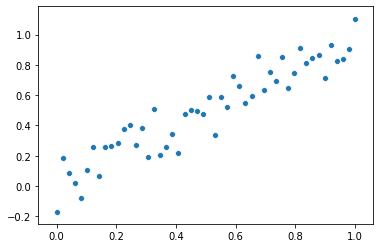

In [44]:
sns.scatterplot(x,y)

    growing trend in a real-world use case— such as growing sales in the months of Oct, Nov, Dec or population growth in the world in 2019 etc.

In [51]:
X_train, X_val = x[:40], x[40:]
X_train = X_train.reshape(-1,1)
X_val = X_val.reshape(-1,1)
y_train, y_val = y[:40], y[40:]

In [99]:
m = RandomForestRegressor(n_estimators=10)
m.fit(X_train, y_train)
prediction = m.predict(X_train)

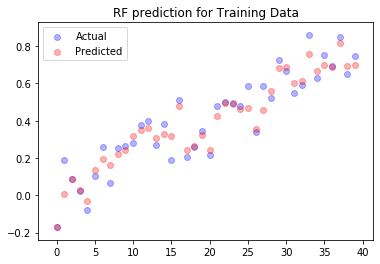

In [100]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_train.size), y=y_train, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, prediction.size), y=prediction, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('RF prediction for Training Data')
plt.legend()
plt.show()

In [101]:
prediction1 = m.predict(X_val)

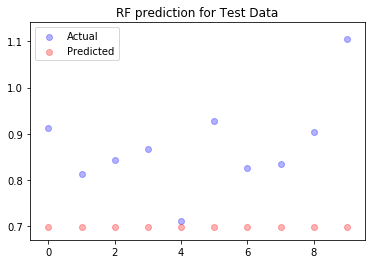

In [102]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_val.size), y=y_val, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, prediction1.size), y=prediction1, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('RF prediction for Test Data')
plt.legend()
plt.show()

For any data, that a Random Forest has not seen before, at best, it can predict an average of training values that it has seen before. If the Validation set consists of data points that are greater or less than the training data points, a Random Forest will provide us with Average results as it is not able to Extrapolate and understand the growing/decreasing trend in our data.

Therefore, a **Random Forest** model does not scale very well for **time-series data** and might need to be constantly updated in Production or trained with some Random Data that lies outside our range of Training set.

Answering questions like **“What would the Sales be for next Year?”, “What would the population of China be after 5 years?”, “What would the global temperature be in 50 years from now?”, “How many units am I expected to sell for gloves in the next three months?”** becomes really difficult when using Random Forests.

## K-Means Clustering

**<**PROS**>**
    
- Relatively simple to implement.
- Scales to large data sets.
- Guarantees convergence.
- Can warm-start the positions of centroids.
- Easily adapts to new examples.
- Generalizes to clusters of different shapes and sizes, such as elliptical clusters.

**<**CONS**>**
- Not suitable for all types of data
- susceptible to initialization problems and outliers
- restricted to data in which there is a notion of a center
- needs to know in advance how many clusters there will be in your data, so this may require a lot of trials to “guess” the best K number of clusters to define.

**Explanation Using Data**

In [110]:
# get the data
athlete = pd.read_csv('athlete_events.csv')

Data from Kaggle

Link: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

In [111]:
athlete.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [112]:
#split the data
train, test = train_test_split(athlete, test_size=0.2)

In [115]:
#drop 'Medal' because it has too many NaN values
train.drop('Medal',axis=1, inplace = True)

In [116]:
# Create a label encoder object
le = LabelEncoder()

# Iterate through the columns
for col in train:
    if train[col].dtype == 'object':
        le.fit(train[col])
        train[col] = le.transform(train[col])

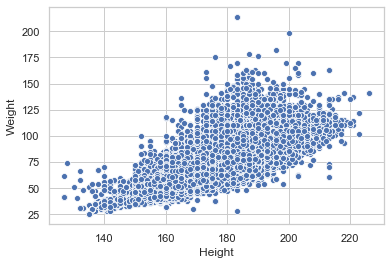

In [117]:
sns.scatterplot('Height','Weight',data=train)

**What does your data look like?**

A simple **visualization** of the data with a scatter plot can provide insights into whether your data is well suited for clustering. For example, above is a scatter plot of Olympic athlete height and weight. 

Clearly the two attributes have a strong positive correlation and form a dense central grouping, apart from a few outliers.

After running several clustering algorithms on this data, no distinct or meaningful groups were formed and it was determined that these attributes were **not well suited for clustering!** However, by simply visualizing the data early on in the analysis, this conclusion could have been made sooner.

**If visualization reveals that your data has no amount of separation or distinct groups, then clustering may not be appropriate.**

In [120]:
#drop NaN values
train.dropna(inplace=True)

In [121]:
#apply KMeans clustering
km = KMeans(n_clusters=3)
y_km = km.fit_predict(train)

In [124]:
#add cluster column
y = y_km.tolist()
train['cluster'] = y
train.head()

ID    Name  Sex   Age  Height  Weight  Team  NOC  Games  Year  \
98793    49996   43614    1  22.0   184.0    82.0   294   76     26  1968   
94312    47735   21006    0  31.0   181.0    72.0   243   52     40  1996   
219996  110511   31324    1  20.0   176.0    75.0   797  163     27  1972   
102644   51926  108653    1  21.0   168.0    63.0   954  214     25  1968   
120097   60789  104447    1  41.0   182.0    90.0   149   32     44  2004   

        Season  City  Sport  Event  cluster  
98793        1    12     34    413        0  
94312        0     4      8    160        0  
219996       0    23      5     93        1  
102644       0    20     27    376        2  
120097       0     3     47    501        2

In [125]:
# get the mean of Height/Weight group by cluster
fin1 = train.groupby('cluster').agg({'Height': lambda x: x.mean()}).reset_index()
fin2 =  train.groupby('cluster').agg({'Weight': lambda x: x.mean()}).reset_index()

In [126]:
final = pd.merge(fin1,fin2,on='cluster')
final

cluster      Height     Weight
0        0  175.459510  70.772211
1        1  175.905271  71.334543
2        2  174.849381  70.039602

**Does clustering provide any new insight into the data?**

After performing a clustering analysis, it is crucial to examine the observations in the individual clusters. This step allows us to assess whether or not the clusters provide any new insight into the data. **Did the algorithm really find similar groups of observations and maximize intraclass similarity while minimizing between cluster similarity?**

An easy way to examine clusters is to calculate simple statistics for the observations in each cluster, such as the mean. Above(**final** dataset) is the mean Olympic athlete height and weight for three clusters as a result of K-Means clustering.

When we see the dataframe, the mean heights and weights are almost identical. This demonstrates that, while the algorithm did cluster the data, the clusters are not substantially different from each other! **If clustering fails to produce any new or useful insights into the data, then the data is not well suited for clustering.**

# Conclusion

We can use the the factors that we discussed above to decide the algorithm but it is hard to know right at the begining which model will be the best fit to our problem. 

First, we identify potential good approahces. Then throw our data into them and run them. At the end, evaluate the performance of the models and select the best one. Thus, it is usually best to work iteratively.

However, developing the right model to a real life problem is rarely just decided through the metrics of the models. It requires thorough understanding of the business demands, rules and regulations as well as considerable expertise. When we solve real life problems with machine learning algorithms, it is crucial that we know how to combine and balance them.